# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
from pandas_profiling import ProfileReport # generate visualization report of features as html
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

Path to the DataSet

In [2]:
path_to_adv_data='/Users/yaseenh/Downloads/data.csv'


### The representation of  data can have a bigger influence in the performance of  model than the type of model or the exact hyperparameters you use. Hence selected appropiate types to reduce the dataset size in memory.


In [212]:
types = { 'like': np.dtype(int), 'hour': np.dtype(int), 'A': np.dtype(int), 'pos': np.dtype(int),
         'sid': np.dtype(str), 'sdomain': np.dtype(str), 'scat': np.dtype(str), 'aid': np.dtype(str),
         'adomain': np.dtype(str), 'acat': np.dtype(str), 'did': np.dtype(str),
         'dip': np.dtype(str), 'dmodel': np.dtype(str), 'dtype': np.dtype(int), 'dconn': np.dtype(int),
         'B': np.dtype(int), 'C': np.dtype(int), 'D': np.dtype(int), 'E': np.dtype(int), 'F': np.dtype(int), 'G': np.dtype(int),
         'H': np.dtype(int), 'I': np.dtype(int)}



In [213]:
%%time
df = pd.read_csv(path_to_adv_data,usecols=types.keys(), dtype=types)
df.head()

CPU times: user 1min 25s, sys: 42.8 s, total: 2min 8s
Wall time: 2min 13s


,like,hour,sid,sdomain,scat,aid,adomain,acat,did,dip,...,pos,A,B,C,D,E,F,G,H,I
0,0,19122100,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,ddd2926e,...,0,1005,15706,320,50,1722,0,35,-1,79
1,0,19122100,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,96809ac8,...,0,1005,15704,320,50,1722,0,35,100084,79
2,0,19122100,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,b3cf8def,...,0,1005,15704,320,50,1722,0,35,100084,79
3,0,19122100,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,e8275b8f,...,0,1005,15706,320,50,1722,0,35,100084,79
4,0,19122100,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,07d7df22,a99f214a,9644d0bf,...,1,1005,18993,320,50,2161,0,35,-1,157


In [214]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40428967 entries, 0 to 40428966
Data columns (total 23 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   like     int64 
 1   hour     int64 
 2   sid      object
 3   sdomain  object
 4   scat     object
 5   aid      object
 6   adomain  object
 7   acat     object
 8   did      object
 9   dip      object
 10  dmodel   object
 11  dtype    int64 
 12  dconn    int64 
 13  pos      int64 
 14  A        int64 
 15  B        int64 
 16  C        int64 
 17  D        int64 
 18  E        int64 
 19  F        int64 
 20  G        int64 
 21  H        int64 
 22  I        int64 
dtypes: int64(14), object(9)
memory usage: 26.2 GB


#Sampling Data for 1Million records because of size of huge data and memory issues for visualisation and modelling on laptop

In [160]:
df_sample_data=df.sample(n=1000000)
df_sample_data.head()

,like,hour,sid,sdomain,scat,aid,adomain,acat,did,dip,...,pos,A,B,C,D,E,F,G,H,I
12688502,0,19122318,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,ce6db48d,...,0,1005,15708,320,50,1722,0,35,-1,79
138842,0,19122101,85f751fd,c4e18dd6,50e219e0,3bfa19cb,2347f47a,0f2161f8,9b10294c,8e1f8dfb,...,0,1005,21647,320,50,2487,1,547,-1,51
28101303,0,19122807,85f751fd,c4e18dd6,50e219e0,7358e05e,b9528b13,cef3e649,5ec2c9e6,625345d4,...,0,1005,18574,320,50,2104,3,559,-1,171
5442654,0,19122207,856e6d3f,58a89a43,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,c2db5589,...,1,1005,16208,320,50,1800,3,167,100075,23
29431301,0,19122811,57ef2c87,bd6d812f,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,eb32979b,...,1,1005,19771,320,50,2227,0,935,-1,48


In [7]:
df_sample_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 26598963 to 10628397
Data columns (total 23 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   like     1000000 non-null  int64 
 1   hour     1000000 non-null  int64 
 2   sid      1000000 non-null  object
 3   sdomain  1000000 non-null  object
 4   scat     1000000 non-null  object
 5   aid      1000000 non-null  object
 6   adomain  1000000 non-null  object
 7   acat     1000000 non-null  object
 8   did      1000000 non-null  object
 9   dip      1000000 non-null  object
 10  dmodel   1000000 non-null  object
 11  dtype    1000000 non-null  int64 
 12  dconn    1000000 non-null  int64 
 13  pos      1000000 non-null  int64 
 14  A        1000000 non-null  int64 
 15  B        1000000 non-null  int64 
 16  C        1000000 non-null  int64 
 17  D        1000000 non-null  int64 
 18  E        1000000 non-null  int64 
 19  F        1000000 non-null  int64 
 20  G        1000000

In [98]:
df_sample_data.nunique()

like            2
hour          240
sid          2665
sdomain      2861
scat           22
aid          3163
adomain       191
acat           28
did        150700
dip        555690
dmodel       5180
dtype           5
dconn           4
pos             7
A               7
B            2245
C               8
D               9
E             423
F               4
G              66
H             162
I              60
dtype: int64

## Most of the features are categorical and most of the categorical features have a lot of values.
- like                    :  Target variable (To predict)
- sid,sdomain,sitecategory:  Site related features
- aid,adomain,acat        :  Mobile App related features
- did,dip,dmodel,dtype,dconn: Mobile Device features
- A-I                     : Anonymized Categorical features 
- pos                     : position of promotion within user's mobile


In [99]:
#Distribution of Target variable in whole dataset
df.like.value_counts(normalize=True)*100

0    83.019438
1    16.980562
Name: like, dtype: float64

In [100]:
#Distribution of Target variable in random Sampled dataset
df_sample_data.like.value_counts(normalize=True)*100

0    83.0103
1    16.9897
Name: like, dtype: float64

### Whenever user clicks on the ad it shows the likedness\interest towards that particular ad .So basically we are measuring CTR(click through rate) through this dataset.

### The overall click through promotion rate for sampled data(1 M) is approximately 17% and  83% is not liked(clicked) promotion ad.The sampled data and original dataset(40M records) have similar CTR(likedness) distribution for ads.

### Hence going forward we would be using smaller sampled dataset for quicker and faster modelling and analysis.



In [101]:
df_sample_data.shape

(1000000, 23)

Features Based on Time to understand the behavior of ads traffic with respect to devices/sites/apps
- Hour
- Day of Week
- Day

In [161]:

df_sample_data['hour']=df_sample_data['hour'].apply(lambda x:datetime.strptime(str(x),'%y%m%d%H'))
df_sample_data.head()

,like,hour,sid,sdomain,scat,aid,adomain,acat,did,dip,...,pos,A,B,C,D,E,F,G,H,I
12688502,0,2019-12-23 18:00:00,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,ce6db48d,...,0,1005,15708,320,50,1722,0,35,-1,79
138842,0,2019-12-21 01:00:00,85f751fd,c4e18dd6,50e219e0,3bfa19cb,2347f47a,0f2161f8,9b10294c,8e1f8dfb,...,0,1005,21647,320,50,2487,1,547,-1,51
28101303,0,2019-12-28 07:00:00,85f751fd,c4e18dd6,50e219e0,7358e05e,b9528b13,cef3e649,5ec2c9e6,625345d4,...,0,1005,18574,320,50,2104,3,559,-1,171
5442654,0,2019-12-22 07:00:00,856e6d3f,58a89a43,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,c2db5589,...,1,1005,16208,320,50,1800,3,167,100075,23
29431301,0,2019-12-28 11:00:00,57ef2c87,bd6d812f,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,eb32979b,...,1,1005,19771,320,50,2227,0,935,-1,48


In [162]:
df_sample_data.hour.describe()

count                 1000000
unique                    240
top       2019-12-22 09:00:00
freq                    11197
first     2019-12-21 00:00:00
last      2019-12-30 23:00:00
Name: hour, dtype: object

Note : We have data from 22nd Dec 2019 till 30th December so almost 11 days of data with 240 unique hour values 

In [163]:
#specific hour
df_sample_data['hour_day']=df_sample_data['hour'].apply(lambda x:x.hour)
df_sample_data.head()

,like,hour,sid,sdomain,scat,aid,adomain,acat,did,dip,...,A,B,C,D,E,F,G,H,I,hour_day
12688502,0,2019-12-23 18:00:00,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,ce6db48d,...,1005,15708,320,50,1722,0,35,-1,79,18
138842,0,2019-12-21 01:00:00,85f751fd,c4e18dd6,50e219e0,3bfa19cb,2347f47a,0f2161f8,9b10294c,8e1f8dfb,...,1005,21647,320,50,2487,1,547,-1,51,1
28101303,0,2019-12-28 07:00:00,85f751fd,c4e18dd6,50e219e0,7358e05e,b9528b13,cef3e649,5ec2c9e6,625345d4,...,1005,18574,320,50,2104,3,559,-1,171,7
5442654,0,2019-12-22 07:00:00,856e6d3f,58a89a43,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,c2db5589,...,1005,16208,320,50,1800,3,167,100075,23,7
29431301,0,2019-12-28 11:00:00,57ef2c87,bd6d812f,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,eb32979b,...,1005,19771,320,50,2227,0,935,-1,48,11


In [164]:
#week day
df_sample_data['week_day']=df_sample_data['hour'].apply(lambda x:x.weekday())
df_sample_data.head()

,like,hour,sid,sdomain,scat,aid,adomain,acat,did,dip,...,B,C,D,E,F,G,H,I,hour_day,week_day
12688502,0,2019-12-23 18:00:00,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,ce6db48d,...,15708,320,50,1722,0,35,-1,79,18,0
138842,0,2019-12-21 01:00:00,85f751fd,c4e18dd6,50e219e0,3bfa19cb,2347f47a,0f2161f8,9b10294c,8e1f8dfb,...,21647,320,50,2487,1,547,-1,51,1,5
28101303,0,2019-12-28 07:00:00,85f751fd,c4e18dd6,50e219e0,7358e05e,b9528b13,cef3e649,5ec2c9e6,625345d4,...,18574,320,50,2104,3,559,-1,171,7,5
5442654,0,2019-12-22 07:00:00,856e6d3f,58a89a43,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,c2db5589,...,16208,320,50,1800,3,167,100075,23,7,6
29431301,0,2019-12-28 11:00:00,57ef2c87,bd6d812f,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,eb32979b,...,19771,320,50,2227,0,935,-1,48,11,5


In [165]:
#Mapping weekdays to values
dict_weekdays={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}

In [166]:
df_sample_data['week_day']=df_sample_data['week_day'].map(dict_weekdays)
df_sample_data.head()

,like,hour,sid,sdomain,scat,aid,adomain,acat,did,dip,...,B,C,D,E,F,G,H,I,hour_day,week_day
12688502,0,2019-12-23 18:00:00,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,ce6db48d,...,15708,320,50,1722,0,35,-1,79,18,Monday
138842,0,2019-12-21 01:00:00,85f751fd,c4e18dd6,50e219e0,3bfa19cb,2347f47a,0f2161f8,9b10294c,8e1f8dfb,...,21647,320,50,2487,1,547,-1,51,1,Saturday
28101303,0,2019-12-28 07:00:00,85f751fd,c4e18dd6,50e219e0,7358e05e,b9528b13,cef3e649,5ec2c9e6,625345d4,...,18574,320,50,2104,3,559,-1,171,7,Saturday
5442654,0,2019-12-22 07:00:00,856e6d3f,58a89a43,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,c2db5589,...,16208,320,50,1800,3,167,100075,23,7,Sunday
29431301,0,2019-12-28 11:00:00,57ef2c87,bd6d812f,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,eb32979b,...,19771,320,50,2227,0,935,-1,48,11,Saturday


In [167]:
#day
df_sample_data['day']=df_sample_data['hour'].apply(lambda x:x.day)
df_sample_data.head()

,like,hour,sid,sdomain,scat,aid,adomain,acat,did,dip,...,C,D,E,F,G,H,I,hour_day,week_day,day
12688502,0,2019-12-23 18:00:00,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,ce6db48d,...,320,50,1722,0,35,-1,79,18,Monday,23
138842,0,2019-12-21 01:00:00,85f751fd,c4e18dd6,50e219e0,3bfa19cb,2347f47a,0f2161f8,9b10294c,8e1f8dfb,...,320,50,2487,1,547,-1,51,1,Saturday,21
28101303,0,2019-12-28 07:00:00,85f751fd,c4e18dd6,50e219e0,7358e05e,b9528b13,cef3e649,5ec2c9e6,625345d4,...,320,50,2104,3,559,-1,171,7,Saturday,28
5442654,0,2019-12-22 07:00:00,856e6d3f,58a89a43,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,c2db5589,...,320,50,1800,3,167,100075,23,7,Sunday,22
29431301,0,2019-12-28 11:00:00,57ef2c87,bd6d812f,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,eb32979b,...,320,50,2227,0,935,-1,48,11,Saturday,28


In [ ]:

profile = ProfileReport(df_sample_data, title="Pandas Profiling Report",explorative=True)

In [ ]:
#profile.to_notebook_iframe()

In [ ]:
profile.to_file('Visual_Analysis.html')

# Exploratory Data Analysis

To understand the relationships and trends of features within the dataset


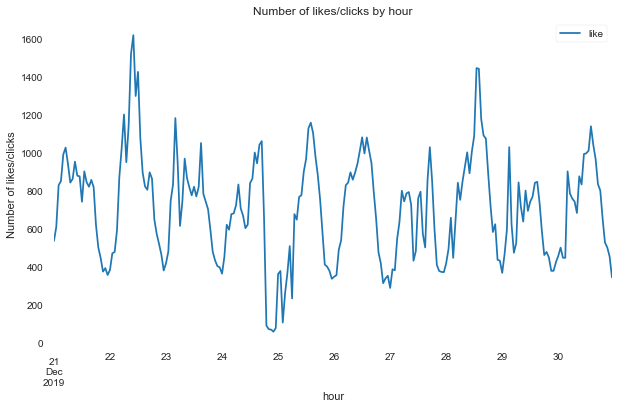

In [168]:
df_sample_data.groupby('hour').agg({'like':'sum'}).plot(figsize=(10,6))
plt.ylabel('Number of likes/clicks')
plt.title('Number of likes/clicks by hour');

- Every day the clicks to ad patterns remain similar with couple of peak hours on days.On 22nd December mid day of and 28th December midday receieved higher traffic of ads clicks.On 24th Decemeber mid-night probably due to christmas eve etc there is off-peak traffic.



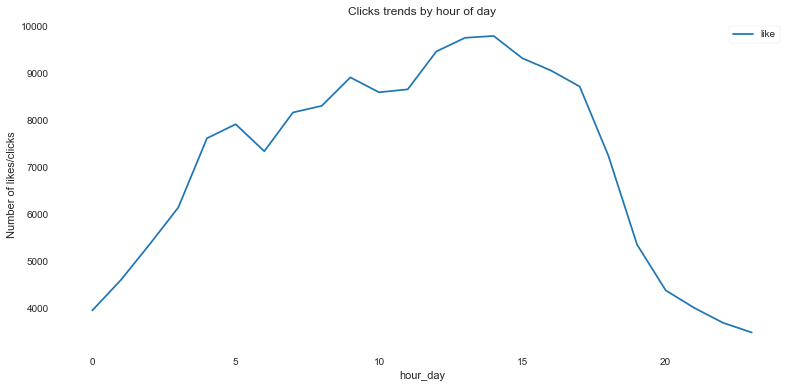

In [169]:
#Hour_day vs Number of likes/clicks
df_sample_data.groupby('hour_day').agg({'like':'sum'}).plot(figsize=(13,6))
plt.ylabel('Number of likes/clicks')
plt.title('Clicks trends by hour of day');

- Highest number of clicks are at afternoon 13 & 14th hour 
- Least number of clicks seems to be at midnight(12am , 0 hour).



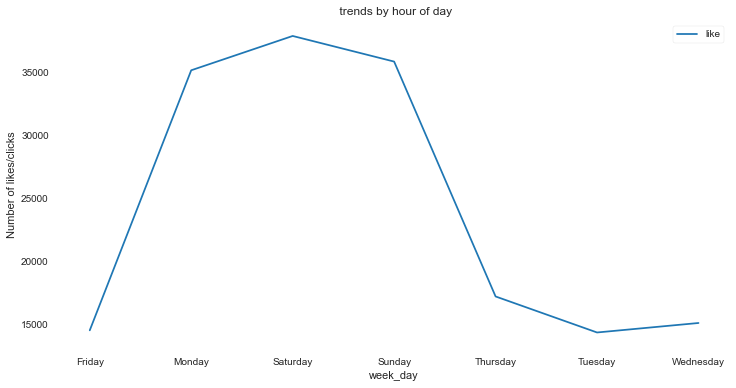

In [170]:
#Weekday vs Number of likes/clicks

df_sample_data.groupby('week_day').agg({'like':'sum'}).plot(figsize=(12,6))
plt.ylabel('Number of likes/clicks')
plt.title(' trends by hour of day');

- Saturday seems have lot of ads clicks whereas Tuesday seems to be lowest

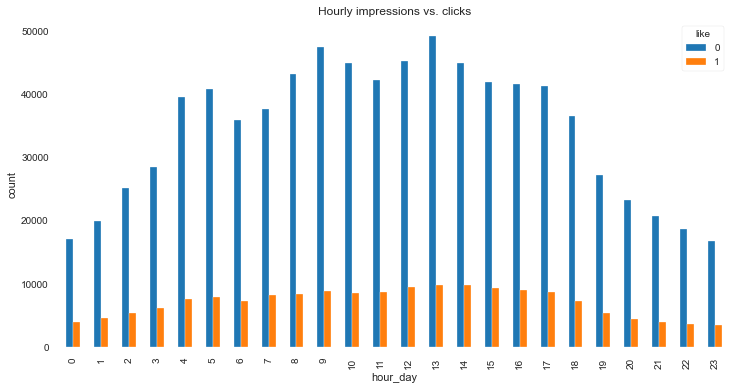

In [171]:
df_sample_data.groupby(['hour_day', 'like']).size().unstack().plot(kind='bar', title="Hour of Day", figsize=(12,6))
plt.ylabel('count')
plt.title('Hourly impressions vs. clicks');

We can calculate Click-through rate (CTR). CTR is the ratio of ad clicks to impressions. It measures the rate of clicks on each ad where user shows interest/likeness is represented through click 

#### CTR  By Hour

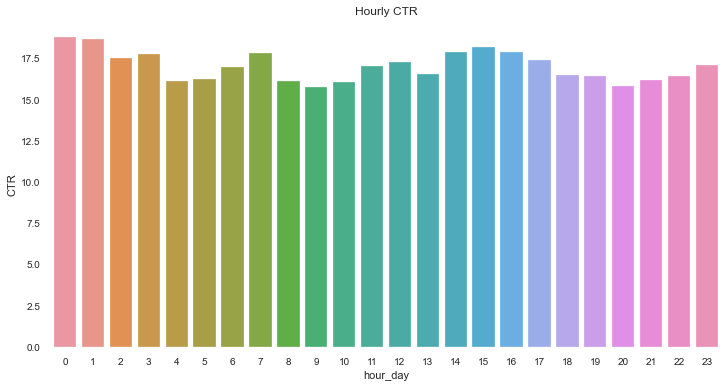

In [172]:
df_like = df_sample_data[df_sample_data['like'] == 1]
df_byhour = df_sample_data[['hour_day','like']].groupby(['hour_day']).count().reset_index()
df_byhour = df_byhour.rename(columns={'like': 'impressions'})
df_byhour['likes'] = df_like[['hour_day','like']].groupby(['hour_day']).count().reset_index()['like']
df_byhour['CTR'] = df_byhour['likes']/df_byhour['impressions']*100

plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='hour_day', data=df_byhour)
plt.title('Hourly CTR');

- Here as we see that the highest CTR happened in the hour of mid-night, 1, 7 and 15. In above analysis we have seen that around mid-night has the least number of impressions and clicks.

#### Day of week CTR

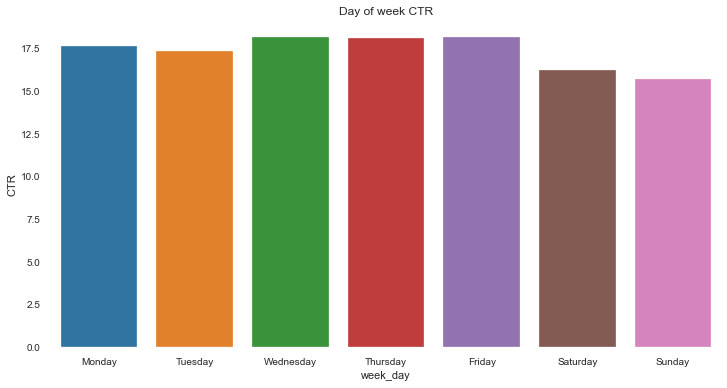

In [173]:
df_like = df_sample_data[df_sample_data['like'] == 1]
df_dayofweek = df_sample_data[['week_day','like']].groupby(['week_day']).count().reset_index()
df_dayofweek = df_dayofweek.rename(columns={'like': 'impressions'})
df_dayofweek['likes'] = df_like[['week_day','like']].groupby(['week_day']).count().reset_index()['like']
df_dayofweek['CTR'] = df_dayofweek['likes']/df_dayofweek['impressions']*100

plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='week_day', data=df_dayofweek, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Day of week CTR');

- Sat and Sunday have higher impressions data based on visualization file(html)..hence lowest CTR
- Tuesday/Friday/wednesday have lowest impressions and highest CTR

### Understanding the Anonymized Features
A-I

In [174]:
df_sample_data.A.value_counts(normalize=True)*100


1005    91.8926
1002     5.4768
1010     2.2279
1012     0.2757
1007     0.0906
1001     0.0227
1008     0.0137
Name: A, dtype: float64

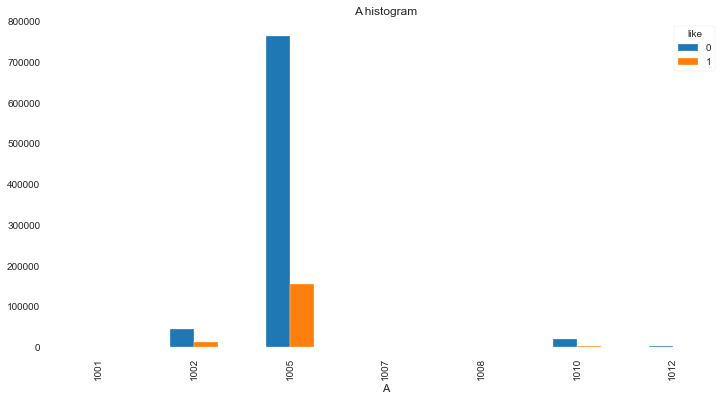

In [175]:
df_sample_data.groupby(['A', 'like']).size().unstack().plot(kind='bar', figsize=(12,6), title='A histogram');


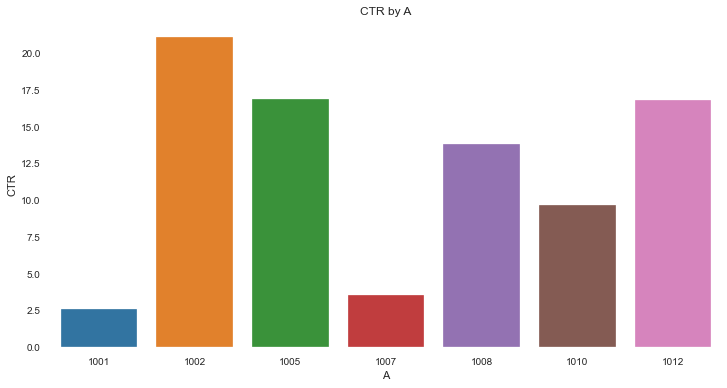

In [176]:
df_A = df_sample_data[['A','like']].groupby(['A']).count().reset_index()
df_A = df_A.rename(columns={'like': 'impressions'})
df_A['likes'] = df_like[['A','like']].groupby(['A']).count().reset_index()['like']
df_A['CTR'] = df_A['likes']/df_A['impressions']*100

plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='A', data=df_A)
plt.title('CTR by A');

- The important C1 values and CTR pairs are:
1005: 92% of the data and 0.17 CTR

1002: 5.5% of the data and 0.21 CTR


1010 : 2.2% of the data and 0.096 CTR

1002 has a much higher than average CTR, and 1010 has a much lower than average CTR.

# Position of ad

In [177]:
def plot_features_stats(df_sample_data,feature):
    
    print(feature + ' Values Distribution with respect to likes/clicked')
    print(df_sample_data[feature].value_counts(normalize=True)[0:10]*100)
    
    df_sample_data.groupby([feature, 'like']).size().unstack().plot(kind='bar', figsize=(12,6), title=' Feature values histogram');
    df_like = df_sample_data[df_sample_data['like'] == 1]
    #CTR by feature values
    
    df_feature = df_sample_data[[feature,'like']].groupby([feature]).count().reset_index()
    df_feature = df_feature.rename(columns={'like': 'impressions'})
    df_feature['likes'] = df_like[[feature,'like']].groupby([feature]).count().reset_index()['like']
    df_feature['CTR'] = df_feature['likes']/df_feature['impressions']*100
    sort_feature = df_feature.sort_values(by='CTR',ascending=False)[feature].tolist()
    plt.figure(figsize=(12,6))
    sns.barplot(y='CTR', x=feature, data=df_feature, order=sort_feature)
    plt.title('CTR by '+ feature)
    print('Number of values')
    print(df_feature[feature].describe())
    


pos Values Distribution with respect to likes/clicked
0    71.9964
1    27.8237
7     0.1098
2     0.0320
4     0.0190
5     0.0137
3     0.0054
Name: pos, dtype: float64
Number of values
count    7.000000
mean     3.142857
std      2.410295
min      0.000000
25%      1.500000
50%      3.000000
75%      4.500000
max      7.000000
Name: pos, dtype: float64


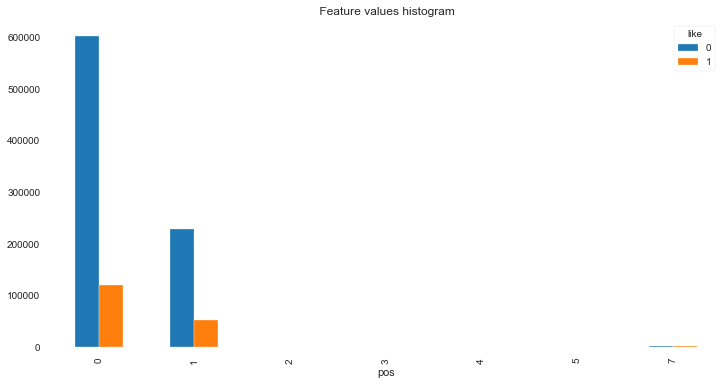

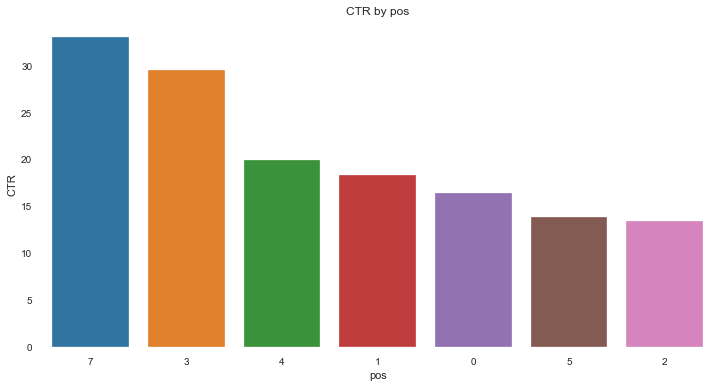

In [178]:
plot_features_stats(df_sample_data,'pos')

- Position of ad is represented through 7 unique values with  0 and 1 have the highest number of impressions and clicks, pos 7 enjoys the highest click through rate. Increasing the number of ads placed on banner position 7 seems to be a good idea



### Features of Site

In [179]:
def compute_plot_features_stats(df_sample_data,feature):
    print(feature + ' Values Distribution with respect to likes/clicked')
    print((df_sample_data[feature].value_counts(normalize=True)*100)[0:10])
    #Top 10 values distribution
    
    top10_feature = df_sample_data[(df_sample_data[feature].isin((df_sample_data[feature].value_counts()/len(df_sample_data))[0:10].index))]
    top10_feature_like = top10_feature[top10_feature['like'] == 1]
    top10_feature.groupby([feature, 'like']).size().unstack().plot(kind='bar', figsize=(12,6), title='Top 10 feature values histogram');

    #CTR by feature values
    df_feature = top10_feature[[feature,'like']].groupby([feature]).count().reset_index()
    df_feature = df_feature.rename(columns={'like': 'impressions'})
    df_feature['likes'] = top10_feature_like[[feature,'like']].groupby([feature]).count().reset_index()['like']
    df_feature['CTR'] = df_feature['likes']/df_feature['impressions']*100
    sort_feature = df_feature.sort_values(by='CTR',ascending=False)[feature].tolist()
    plt.figure(figsize=(12,6))
    sns.barplot(y='CTR', x=feature, data=df_feature, order=sort_feature)
    plt.title('CTR by top 10 feature values');
    print('Number of values')
    print(df_feature[feature].describe())
    print("Unique values of feature in data",df_sample_data[feature].nunique())
    

sid Values Distribution with respect to likes/clicked
85f751fd    36.1365
1fbe01fe    15.9889
e151e245     6.5744
d9750ee7     2.3985
5b08c53b     2.2703
5b4d2eda     1.9272
856e6d3f     1.8607
a7853007     1.1227
b7e9786d     0.9162
5bcf81a2     0.8550
Name: sid, dtype: float64
Number of values
count           10
unique          10
top       856e6d3f
freq             1
Name: sid, dtype: object
Unique values of feature in data 2631


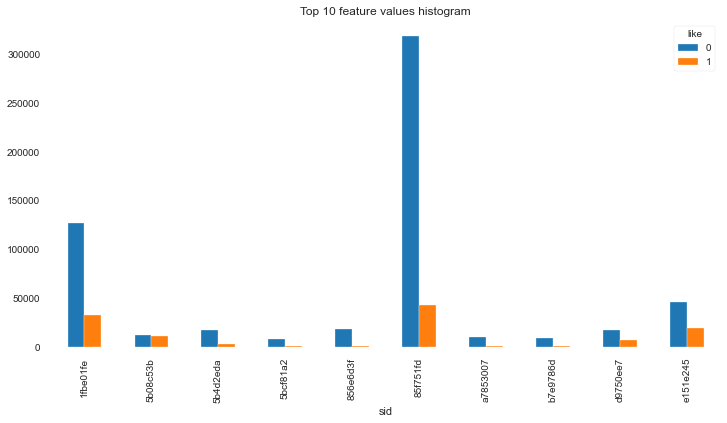

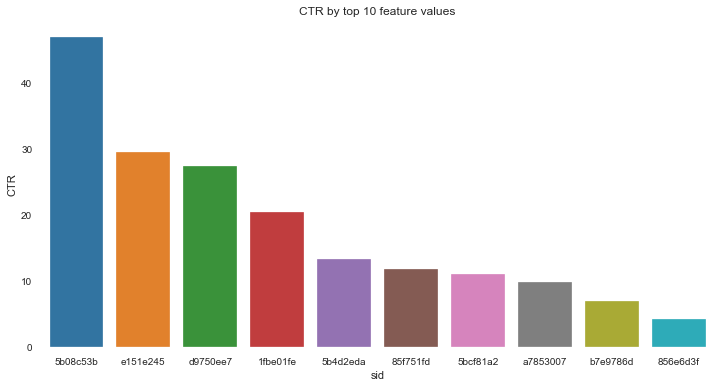

In [180]:
compute_plot_features_stats(df_sample_data,'sid')

The site_id feature seems important because the CTR for the top 10 sites, some as high as 0.47, and some as low as 0.04, and they are significantly different from overall CTR 0.16(approx).

### Domain of Site

sdomain Values Distribution with respect to likes/clicked
c4e18dd6    37.4492
f3845767    15.9889
7e091613     8.2601
7687a86e     3.2004
98572c79     2.4830
16a36ef3     2.1295
58a89a43     1.8607
9d54950b     0.9462
b12b9f85     0.9282
17d996e6     0.8508
Name: sdomain, dtype: float64
Number of values
count           10
unique          10
top       98572c79
freq             1
Name: sdomain, dtype: object
Unique values of feature in data 2891


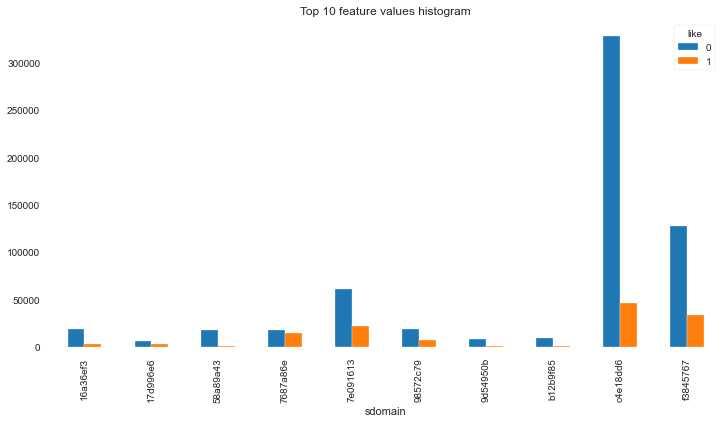

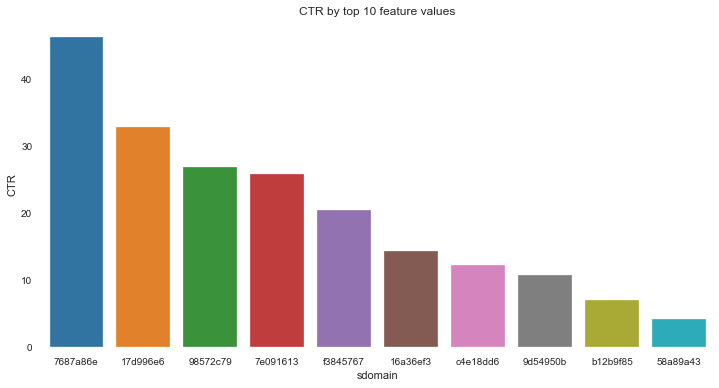

In [181]:
compute_plot_features_stats(df_sample_data,'sdomain')

### Site Categories

scat Values Distribution with respect to likes/clicked
50e219e0    40.9151
f028772b    31.3491
28905ebd    18.1968
3e814130     7.5391
f66779e6     0.6228
75fa27f6     0.4009
335d28a8     0.3326
76b2941d     0.2589
c0dd3be3     0.1053
72722551     0.0713
Name: scat, dtype: float64
Number of values
count           10
unique          10
top       c0dd3be3
freq             1
Name: scat, dtype: object
Unique values of feature in data 22


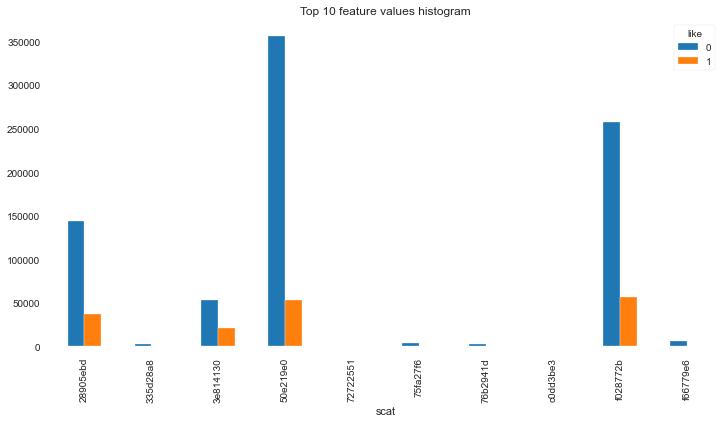

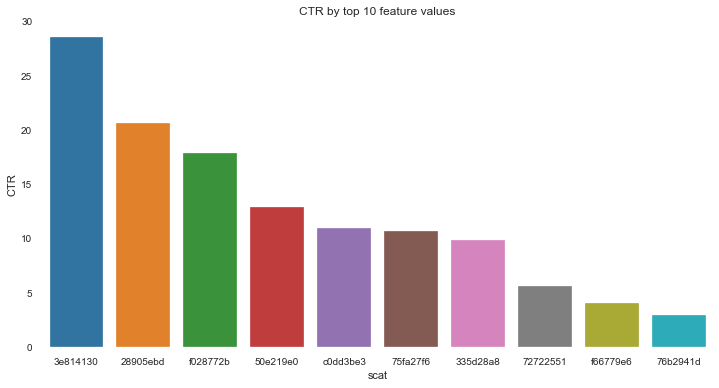

In [182]:

compute_plot_features_stats(df_sample_data,'scat')

### Mobile Device features

did Values Distribution with respect to likes/clicked
a99f214a    82.5237
0f7c61dc     0.0528
c357dbff     0.0464
936e92fb     0.0330
afeffc18     0.0212
d857ffbb     0.0105
987552d1     0.0105
28dc8687     0.0102
b09da1c4     0.0087
cef4c8cc     0.0069
Name: did, dtype: float64
Number of values
count           10
unique          10
top       c357dbff
freq             1
Name: did, dtype: object
Unique values of feature in data 150293


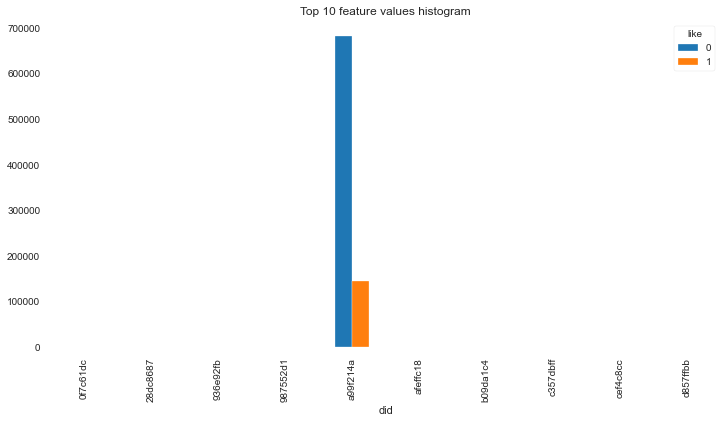

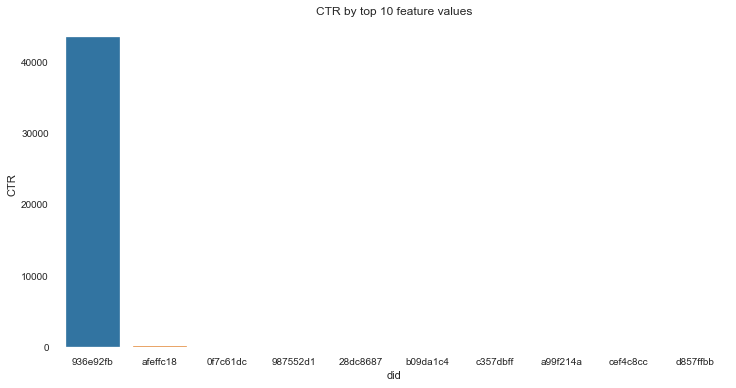

In [183]:
#device id
compute_plot_features_stats(df_sample_data,'did')

- Most of device_id CTR is through a99f214a : Approx. 83% of the data, and the second major device_id is only 0.05% of the data.

dip Values Distribution with respect to likes/clicked
6b9769f2    0.5100
431b3174    0.3254
2f323f36    0.2171
930ec31d    0.2161
af62faf4    0.2151
af9205f9    0.2127
009a7861    0.2127
285aa37d    0.2062
6394f6f6    0.2060
d90a7774    0.1996
Name: dip, dtype: float64
Number of values
count           10
unique          10
top       285aa37d
freq             1
Name: dip, dtype: object
Unique values of feature in data 555329


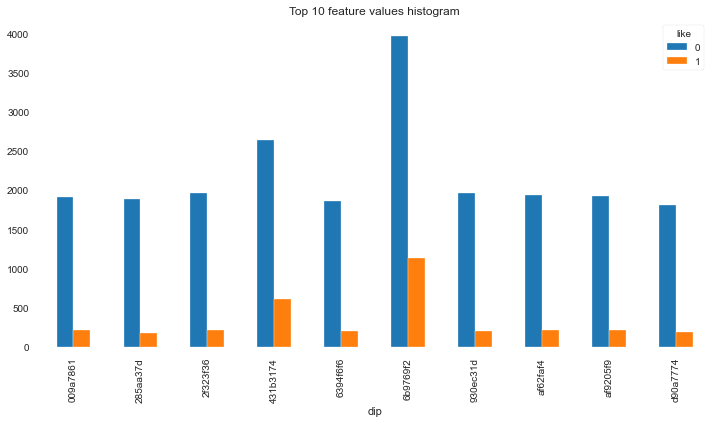

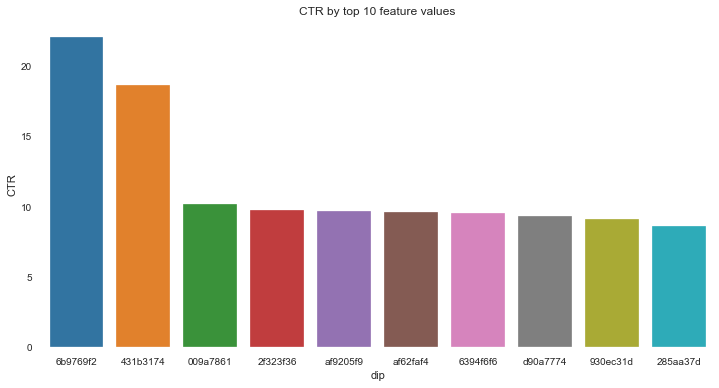

In [184]:
#device ip
compute_plot_features_stats(df_sample_data,'dip')

dtype Values Distribution with respect to likes/clicked
1    92.2953
0     5.4768
4     1.9092
5     0.3187
Name: dtype, dtype: float64
Number of values
count    4.000000
mean     2.500000
std      2.380476
min      0.000000
25%      0.750000
50%      2.500000
75%      4.250000
max      5.000000
Name: dtype, dtype: float64
Unique values of feature in data 4


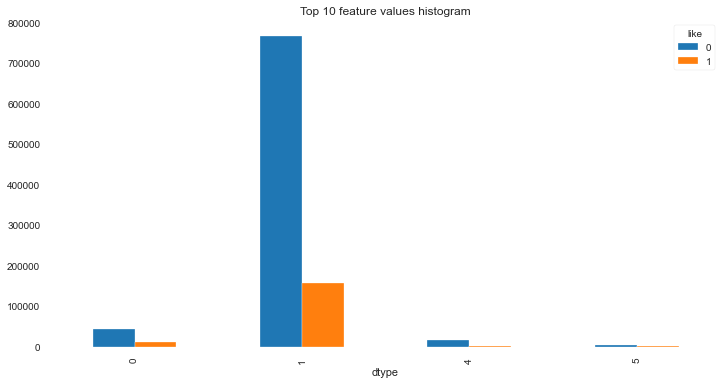

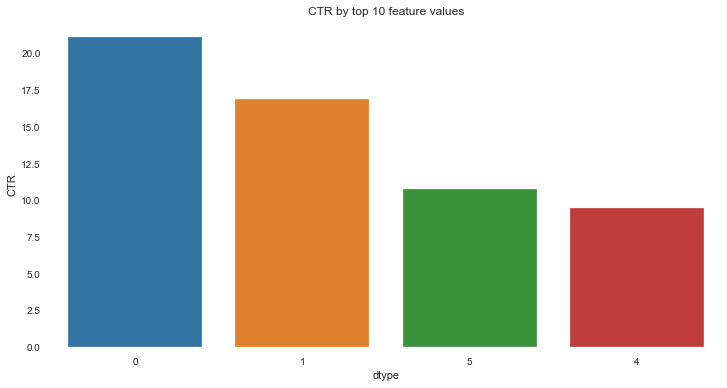

In [185]:
#device types
compute_plot_features_stats(df_sample_data,'dtype')

### App Features

acat Values Distribution with respect to likes/clicked
07d7df22    64.6876
0f2161f8    23.6439
cef3e649     4.3090
8ded1f7a     3.6383
f95efa07     2.8158
d1327cf5     0.3005
dc97ec06     0.1435
09481d60     0.1335
75d80bbe     0.1033
fc6fa53d     0.0559
Name: acat, dtype: float64
Number of values
count           10
unique          10
top       09481d60
freq             1
Name: acat, dtype: object
Unique values of feature in data 25


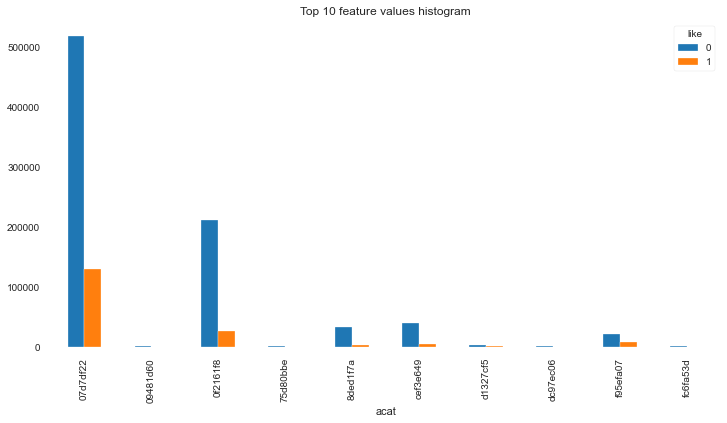

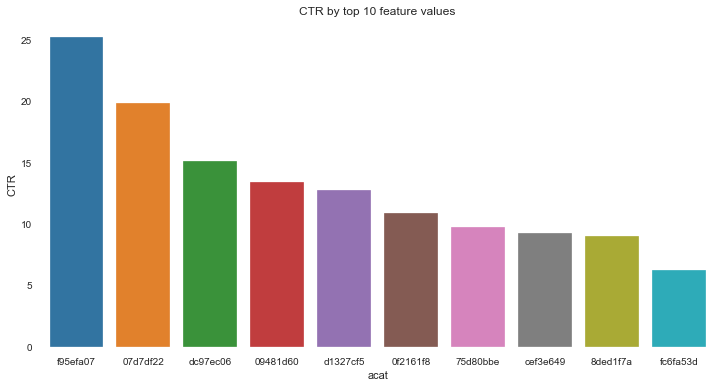

In [186]:
#App category
compute_plot_features_stats(df_sample_data,'acat')

adomain Values Distribution with respect to likes/clicked
7801e8d9    67.3315
2347f47a    12.9505
ae637522     4.6869
5c5a694b     2.7679
82e27996     1.8846
d9b5648e     1.7426
b9528b13     1.6251
0e8616ad     1.6249
b8d325c3     1.3349
aefc06bd     0.7525
Name: adomain, dtype: float64
Number of values
count           10
unique          10
top       5c5a694b
freq             1
Name: adomain, dtype: object
Unique values of feature in data 201


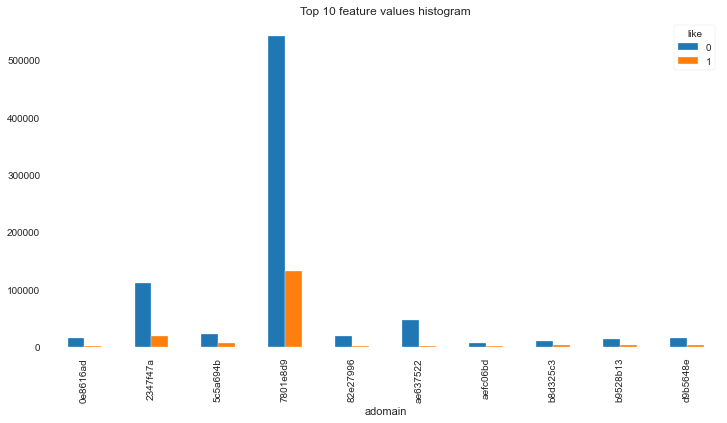

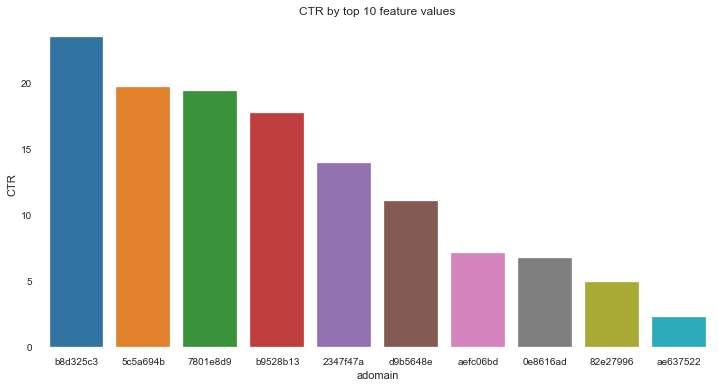

In [187]:
#App domain
compute_plot_features_stats(df_sample_data,'adomain')

### Anonymized categorical Features

### Feature B

B Values Distribution with respect to likes/clicked
4687     2.3742
21611    2.2460
21191    1.9060
21189    1.9008
19771    1.8060
19772    1.7941
16208    1.6164
20108    1.4564
8330     1.3581
19950    1.2927
Name: B, dtype: float64
Number of values
count       10.000000
mean     17281.700000
std       5932.122499
min       4687.000000
25%      17098.750000
50%      19861.000000
75%      20918.750000
max      21611.000000
Name: B, dtype: float64
Unique values of feature in data 2230


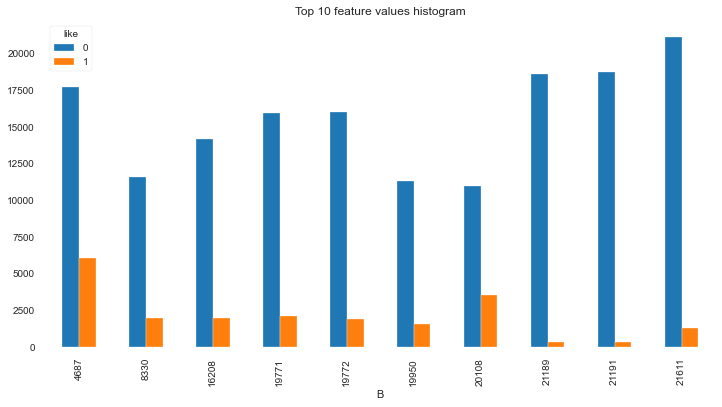

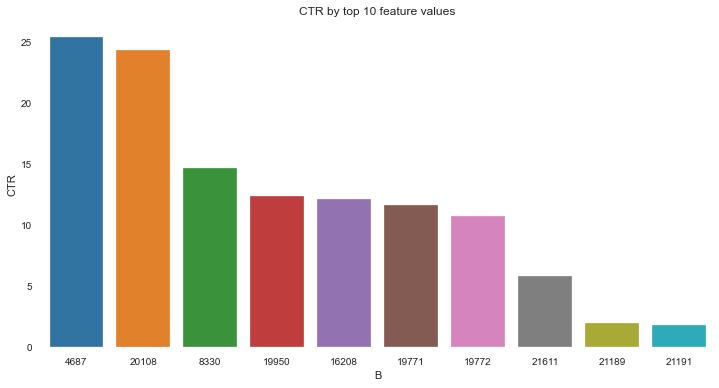

In [188]:
compute_plot_features_stats(df_sample_data,'B')

### Feature C

C Values Distribution with respect to likes/clicked
320     93.2628
300      5.7945
216      0.7395
728      0.1807
120      0.0079
1024     0.0062
480      0.0044
768      0.0040
Name: C, dtype: float64
Number of values
count       8.000000
mean      494.500000
std       315.322511
min       120.000000
25%       279.000000
50%       400.000000
75%       738.000000
max      1024.000000
Name: C, dtype: float64
Unique values of feature in data 8


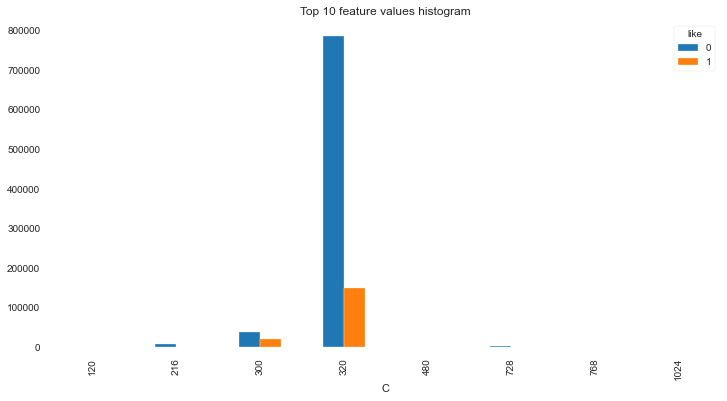

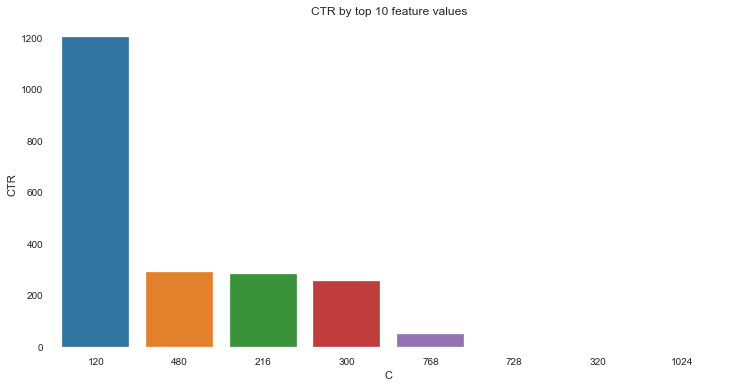

In [189]:

compute_plot_features_stats(df_sample_data,'C')

### Feature D

D Values Distribution with respect to likes/clicked
50      94.3156
250      4.4817
36       0.7395
480      0.2600
90       0.1807
20       0.0079
768      0.0062
320      0.0044
1024     0.0040
Name: D, dtype: float64
Number of values
count       9.000000
mean      337.555556
std       357.159317
min        20.000000
25%        50.000000
50%       250.000000
75%       480.000000
max      1024.000000
Name: D, dtype: float64
Unique values of feature in data 9


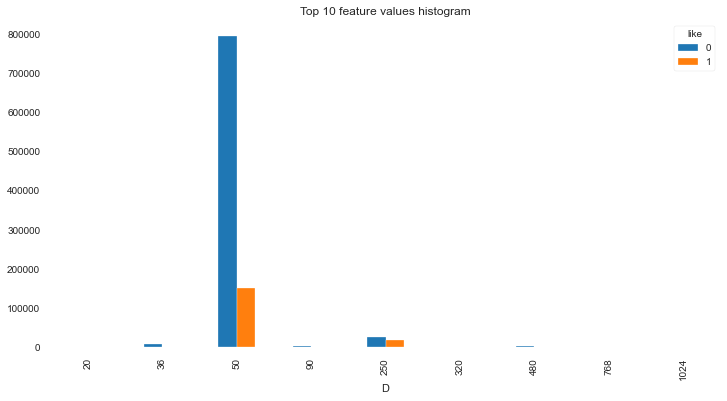

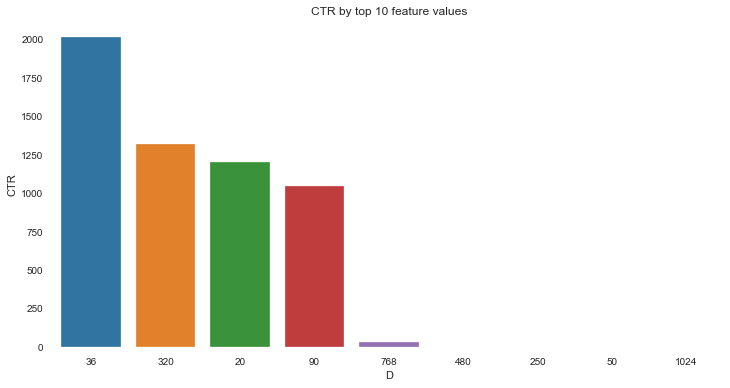

In [190]:

compute_plot_features_stats(df_sample_data,'D')

### Features E_I

E Values Distribution with respect to likes/clicked
1722    11.1232
2424     3.8069
2227     3.6341
1800     2.9174
423      2.3742
2480     2.2736
2502     2.1109
2528     2.0426
2506     1.9977
2374     1.8580
Name: E, dtype: float64
Number of values
count      10.000000
mean     2098.600000
std       657.892122
min       423.000000
25%      1906.750000
50%      2399.000000
75%      2496.500000
max      2528.000000
Name: E, dtype: float64
Unique values of feature in data 420
F Values Distribution with respect to likes/clicked
0    41.8666
3    33.7399
2    17.6451
1     6.7484
Name: F, dtype: float64
Number of values
count    4.000000
mean     1.500000
std      1.290994
min      0.000000
25%      0.750000
50%      1.500000
75%      2.250000
max      3.000000
Name: F, dtype: float64
Unique values of feature in data 4
G Values Distribution with respect to likes/clicked
35      30.0996
39      21.8402
167      7.7588
161      3.9430
47       3.5966
1327     2.7090
297      2.5155
163   

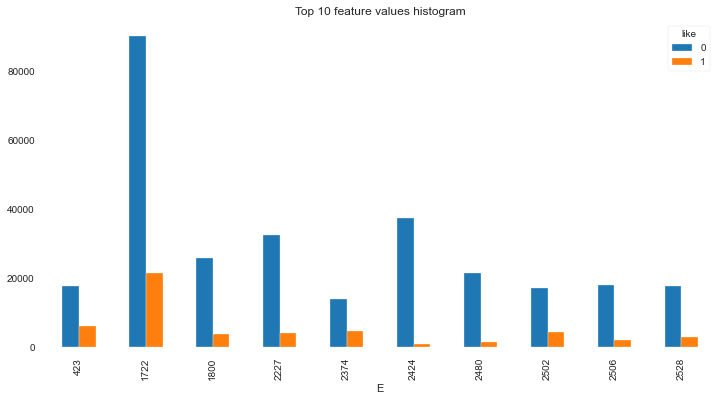

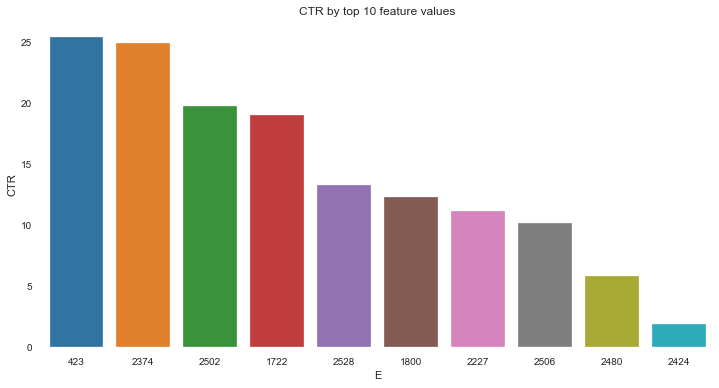

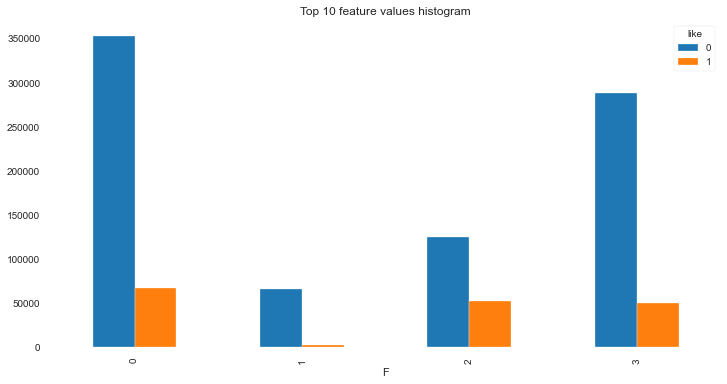

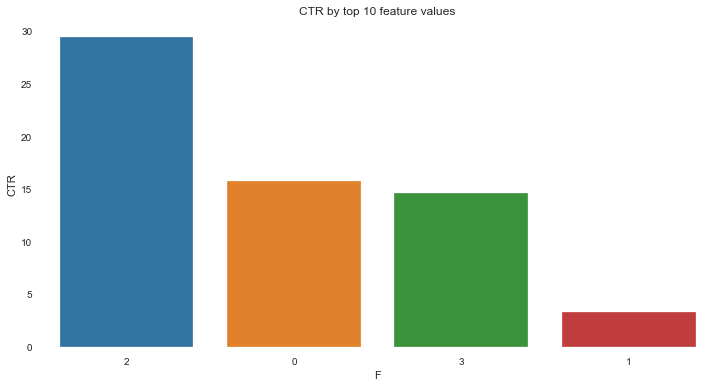

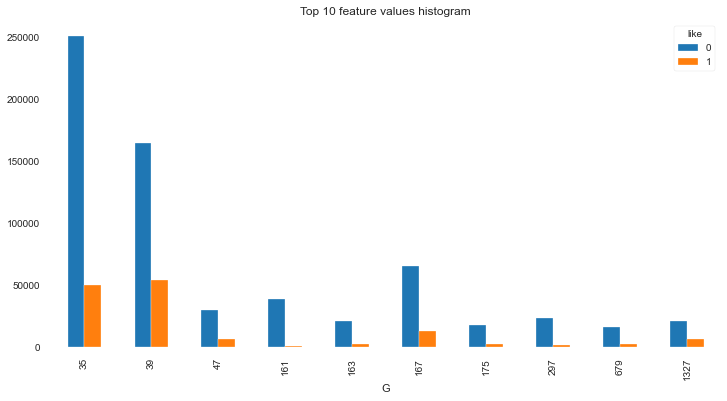

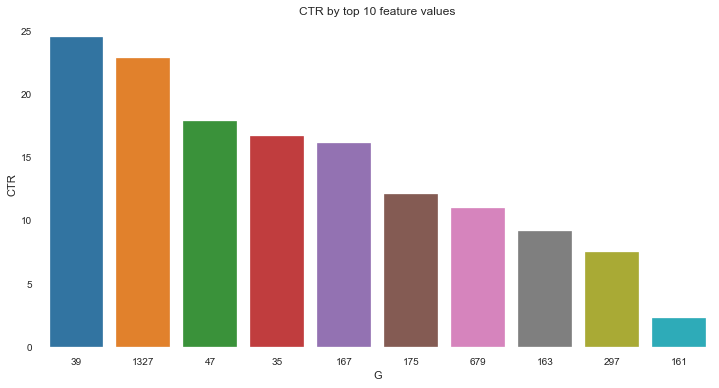

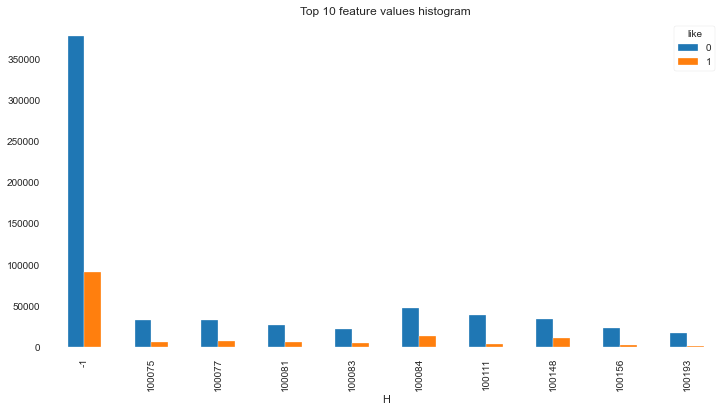

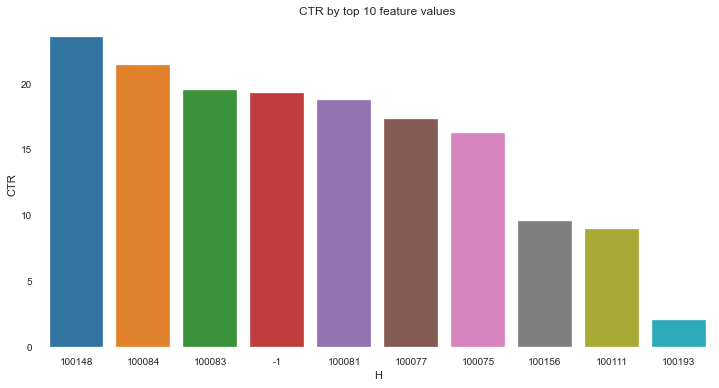

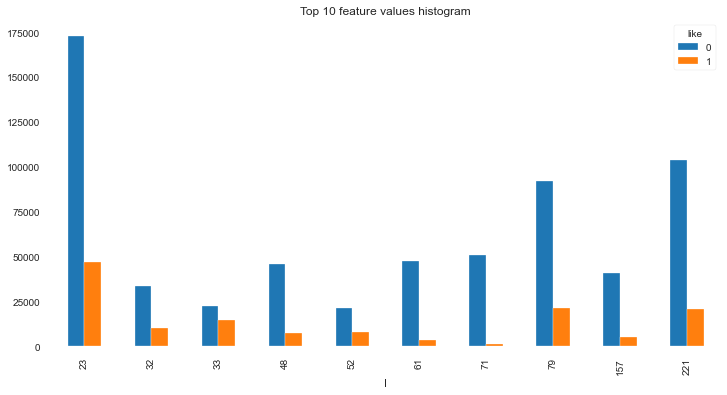

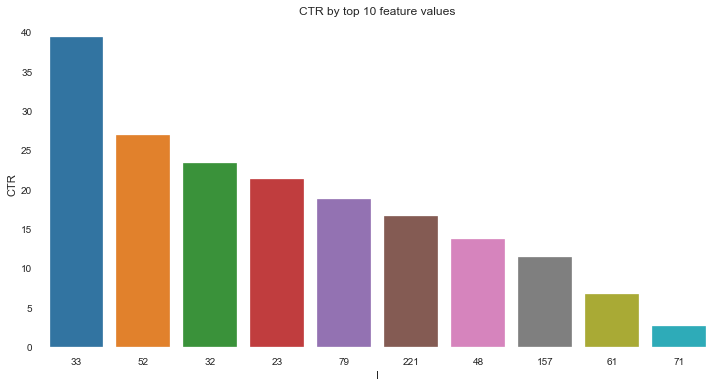

In [191]:

compute_plot_features_stats(df_sample_data,'E')

compute_plot_features_stats(df_sample_data,'F')

compute_plot_features_stats(df_sample_data,'G')

compute_plot_features_stats(df_sample_data,'H')


compute_plot_features_stats(df_sample_data,'I')



- As we see ,most of the data(85%) was from a single device and if we can combine device information together to reduce features and also give a coherent view .
but considering the time constraints I would goahead with modelling and see the results accordingly.


In [192]:
df_sample_data.columns

Index(['like', 'hour', 'sid', 'sdomain', 'scat', 'aid', 'adomain', 'acat',
       'did', 'dip', 'dmodel', 'dtype', 'dconn', 'pos', 'A', 'B', 'C', 'D',
       'E', 'F', 'G', 'H', 'I', 'hour_day', 'week_day', 'day'],
      dtype='object')

In [193]:
# df_sample_data_reduced=df_sample_data.copy()

In [194]:
# device = df_sample_data_reduced['did'].value_counts().index[0]
# df_sample_data_reduced['user'] = (df_sample_data_reduced['dip'] + df_sample_data_reduced['dmodel']) * (df_sample_data_reduced['did']==device) + df_sample_data_reduced['did'] * (df_sample_data_reduced['did']!=device)



In [195]:
# df_sample_data_reduced['site'] =df_sample_data_reduced['sid'] + df_sample_data_reduced['sdomain']
# df_sample_data_reduced=df_sample_data_reduced.drop(columns=['sid','sdomain'], axis=1)

In [196]:
# df_sample_data_reduced=df_sample_data_reduced.drop(columns=['dip','did','dmodel'], axis=1)
# df_sample_data_reduced.head()

,like,hour,scat,aid,adomain,acat,dtype,dconn,pos,A,...,E,F,G,H,I,hour_day,week_day,day,user,site
12688502,0,2019-12-23 18:00:00,28905ebd,ecad2386,7801e8d9,07d7df22,1,0,0,1005,...,1722,0,35,-1,79,18,Monday,23,ce6db48d8a4875bd,1fbe01fef3845767
138842,0,2019-12-21 01:00:00,50e219e0,3bfa19cb,2347f47a,0f2161f8,1,0,0,1005,...,2487,1,547,-1,51,1,Saturday,21,9b10294c,85f751fdc4e18dd6
28101303,0,2019-12-28 07:00:00,50e219e0,7358e05e,b9528b13,cef3e649,1,0,0,1005,...,2104,3,559,-1,171,7,Saturday,28,5ec2c9e6,85f751fdc4e18dd6
5442654,0,2019-12-22 07:00:00,f028772b,ecad2386,7801e8d9,07d7df22,1,0,1,1005,...,1800,3,167,100075,23,7,Sunday,22,c2db558976dc4769,856e6d3f58a89a43
29431301,0,2019-12-28 11:00:00,f028772b,ecad2386,7801e8d9,07d7df22,1,0,1,1005,...,2227,0,935,-1,48,11,Saturday,28,eb32979b0ac04b54,57ef2c87bd6d812f


In [205]:
df_sample_data.shape

(1000000, 26)

### Hashing of features 

- Python has a built in function that performs a hash called hash().. The purposes of the hashing is to minimize memory consumption by the features.
Instead of encoding using One-hot encoder or label ecnoder which could lead to curse of dimensionality .Here I would use Hashing a function that maps a set of objects to a set of integers. When using a hash function, this mapping is performed which takes a key of arbitrary length as input and outputs an integer in a specific range.

In [206]:
def convert_to_hash(df):
    
    object_list_columns = df.columns
    object_list_dtypes = df.dtypes
    new_col_suffix = '_int'
    for index in range(0,len(object_list_columns)):
        if object_list_dtypes[index] == object :
            df[object_list_columns[index]+new_col_suffix] = df[object_list_columns[index]].map( lambda  x: hash(x))
            df.drop([object_list_columns[index]],inplace=True,axis=1)
    return df

In [207]:
#Applying Hashing Function
df_totrain_hashed = convert_to_hash(df_sample_data)

In [208]:
df_totrain_hashed.head()

,like,hour,dtype,dconn,pos,A,B,C,D,E,...,sid_int,sdomain_int,scat_int,aid_int,adomain_int,acat_int,did_int,dip_int,dmodel_int,week_day_int
12688502,0,2019-12-23 18:00:00,1,0,0,1005,15708,320,50,1722,...,-8957809334476807274,7553946051443205476,2130562091633361841,7805814409961345999,-776665081776717179,-957940335628360031,3470267876062906150,-205760404363700517,-6406768632426782182,6686300557777964987
138842,0,2019-12-21 01:00:00,1,0,0,1005,21647,320,50,2487,...,776321843154138061,3785538029929655034,-1211157273377936692,8285347048936576082,2910822173347745509,-2244377406479595259,2619919966429217754,4157144668116398242,-4140531578761986147,-5377926922484226834
28101303,0,2019-12-28 07:00:00,1,0,0,1005,18574,320,50,2104,...,776321843154138061,3785538029929655034,-1211157273377936692,2652813310273656003,-5318083799169890636,5338541528574601834,8458647437711104382,8257793823270513804,2806286555445844708,-5377926922484226834
5442654,0,2019-12-22 07:00:00,1,0,1,1005,16208,320,50,1800,...,-4726369691573721314,8553919644377755207,5972868601436526999,7805814409961345999,-776665081776717179,-957940335628360031,3470267876062906150,6137353008761744717,-6136139363654279014,-9031220084145463596
29431301,0,2019-12-28 11:00:00,1,0,1,1005,19771,320,50,2227,...,7652594469227825789,4102820948812905902,5972868601436526999,7805814409961345999,-776665081776717179,-957940335628360031,3470267876062906150,5823346938975139927,-5541889939449865773,-5377926922484226834


- Dropping certain features like hour

In [209]:

df_totrain_hashed=df_totrain_hashed.drop('hour',axis=1)
df_totrain_hashed.head()

,like,dtype,dconn,pos,A,B,C,D,E,F,...,sid_int,sdomain_int,scat_int,aid_int,adomain_int,acat_int,did_int,dip_int,dmodel_int,week_day_int
12688502,0,1,0,0,1005,15708,320,50,1722,0,...,-8957809334476807274,7553946051443205476,2130562091633361841,7805814409961345999,-776665081776717179,-957940335628360031,3470267876062906150,-205760404363700517,-6406768632426782182,6686300557777964987
138842,0,1,0,0,1005,21647,320,50,2487,1,...,776321843154138061,3785538029929655034,-1211157273377936692,8285347048936576082,2910822173347745509,-2244377406479595259,2619919966429217754,4157144668116398242,-4140531578761986147,-5377926922484226834
28101303,0,1,0,0,1005,18574,320,50,2104,3,...,776321843154138061,3785538029929655034,-1211157273377936692,2652813310273656003,-5318083799169890636,5338541528574601834,8458647437711104382,8257793823270513804,2806286555445844708,-5377926922484226834
5442654,0,1,0,1,1005,16208,320,50,1800,3,...,-4726369691573721314,8553919644377755207,5972868601436526999,7805814409961345999,-776665081776717179,-957940335628360031,3470267876062906150,6137353008761744717,-6136139363654279014,-9031220084145463596
29431301,0,1,0,1,1005,19771,320,50,2227,0,...,7652594469227825789,4102820948812905902,5972868601436526999,7805814409961345999,-776665081776717179,-957940335628360031,3470267876062906150,5823346938975139927,-5541889939449865773,-5377926922484226834


In [210]:
df_totrain_hashed.count()

like            1000000
dtype           1000000
dconn           1000000
pos             1000000
A               1000000
B               1000000
C               1000000
D               1000000
E               1000000
F               1000000
G               1000000
H               1000000
I               1000000
hour_day        1000000
day             1000000
sid_int         1000000
sdomain_int     1000000
scat_int        1000000
aid_int         1000000
adomain_int     1000000
acat_int        1000000
did_int         1000000
dip_int         1000000
dmodel_int      1000000
week_day_int    1000000
dtype: int64

In [204]:
df_totrain_hashed.to_csv('data_hashed_to_train_model.csv',index=None)

### The data has been prepared and ready to be trained with almost 25 columns features and target variable being 'like' column.

### The whole problem is a binary classification problem with evaluation metrics being log_loss(logarthmic loss) .Log Loss quantifies the accuracy of a classifier by penalising false classifications. Minimising the Log Loss is basically equivalent to maximising the accuracy of the classifier.

### A model with lower average impression logloss is preferred and is often used as an indicator of model performance in online advertisement industry

